## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
# application_df = application_df.drop(columns=["EIN", "NAME"], axis=1)
application_df = application_df[["APPLICATION_TYPE", "AFFILIATION", "ORGANIZATION", "ASK_AMT", "IS_SUCCESSFUL"]]

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
ORGANIZATION           4
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_df["APPLICATION_TYPE"].value_counts()[application_df["APPLICATION_TYPE"].value_counts() < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_df["AFFILIATION"].value_counts()

AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_df["AFFILIATION"].value_counts()[application_df["AFFILIATION"].value_counts() < 1500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['AFFILIATION'] = application_df['AFFILIATION'].replace(app,"Other")

# Check to make sure binning was successful
application_df['AFFILIATION'].value_counts()

AFFILIATION
Independent         18480
CompanySponsored    15705
Other                 114
Name: count, dtype: int64

In [10]:
# Look at APPLICATION_TYPE value counts for binning
application_df["ORGANIZATION"].value_counts()

ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: count, dtype: int64

In [11]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_df["ORGANIZATION"].value_counts()[application_df["ORGANIZATION"].value_counts() < 1500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['ORGANIZATION'] = application_df['ORGANIZATION'].replace(app,"Other")

# Check to make sure binning was successful
application_df['ORGANIZATION'].value_counts()

ORGANIZATION
Trust          23515
Association    10255
Other            529
Name: count, dtype: int64

In [13]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,ORGANIZATION,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,Association,5000,1
1,T3,Independent,Other,108590,1
2,T5,CompanySponsored,Association,5000,0
3,T3,CompanySponsored,Trust,6692,1
4,T3,Independent,Trust,142590,1


In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

# Update True/False columns to 1/0
application_df = application_df.replace({True:1, False:0})

application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust
0,5000,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,108590,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,142590,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
print(len(X_train[0]))

16


## Compile, Train and Evaluate the Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=number_input_features))

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=45, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


804/804 [==============================] - 1s 737us/step - loss: 0.6151 - accuracy: 0.7013
Epoch 2/100
804/804 [==============================] - 1s 703us/step - loss: 0.5839 - accuracy: 0.7186
Epoch 3/100
804/804 [==============================] - 1s 694us/step - loss: 0.5802 - accuracy: 0.7198
Epoch 4/100
804/804 [==============================] - 1s 709us/step - loss: 0.5790 - accuracy: 0.7222
Epoch 5/100
804/804 [==============================] - 1s 727us/step - loss: 0.5787 - accuracy: 0.7225
Epoch 6/100
804/804 [==============================] - 1s 714us/step - loss: 0.5780 - accuracy: 0.7222
Epoch 7/100
804/804 [==============================] - 1s 696us/step - loss: 0.5779 - accuracy: 0.7211
Epoch 8/100
804/804 [==============================] - 1s 705us/step - loss: 0.5777 - accuracy: 0.7211
Epoch 9/100
804/804 [==============================] - 1s 710us/step - loss: 0.5777 - accuracy: 0.7227
Epoch 10/100
804/804 [==============================] - 1s 704us/step - loss: 0.5775 

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5731 - accuracy: 0.7230 - 254ms/epoch - 949us/step
Loss: 0.5730555653572083, Accuracy: 0.7230320572853088


<Axes: >

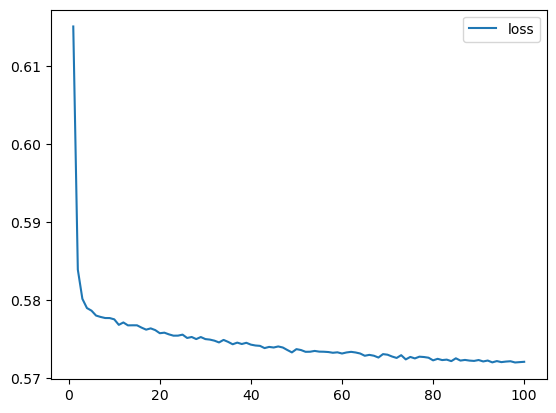

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")


In [23]:
import h5py

# Export our model to HDF5 file
# Warning said HDF5 file was legacy file format, so I used h5 instead of hdf5.
with h5py.File('AlphabetSoupCharity_Optimization.h5', 'w') as f:
    nn.save(f)

c:\Users\inlik\anaconda3\envs\dev2\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
